In [1]:
# https://3months.tistory.com/168

import pandas as pd

df = pd.read_csv('Data/stockprice.csv')
df.head()

,date,price
0,1991-01-01,12588862
1,1991-02-01,12154321
2,1991-03-01,14337072
3,1991-04-01,15108570
4,1991-05-01,17225734


In [2]:
# 문자열 변수 date 를 datetime 타입으로 변경
df['date'] = pd.to_datetime(df['date'])

# 이 날짜를 index로 설정
df = df.set_index('date')
df.head()

,price
date,
1991-01-01,12588862
1991-02-01,12154321
1991-03-01,14337072
1991-04-01,15108570
1991-05-01,17225734


<Axes: xlabel='date'>

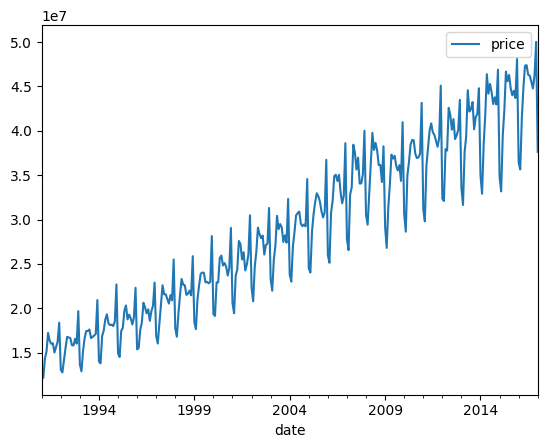

In [3]:
df.plot()    # 분산의 폭은 비슷하나, 평균이 안정적이지 않음

In [4]:
df.shape

(313, 1)

In [5]:
df.describe()

,price
count,3.130000e+02
mean,2.889650e+07
std,9.627899e+06
min,1.215432e+07
25%,2.043227e+07
50%,2.836326e+07
75%,3.701433e+07
max,5.001614e+07


In [6]:
# 인덱스가 0,1,2,3 ... 에서 날짜로 변경됨
# 학습할 변수는 date

import matplotlib.pyplot as plt
split_date = pd.Timestamp('01-01-2011')

# 학습용: 2011/1/1까지의 자료
# 검증용: 이후 자료

train = df.loc[:split_date, ['price']]
test = df.loc[split_date:, ['price']]


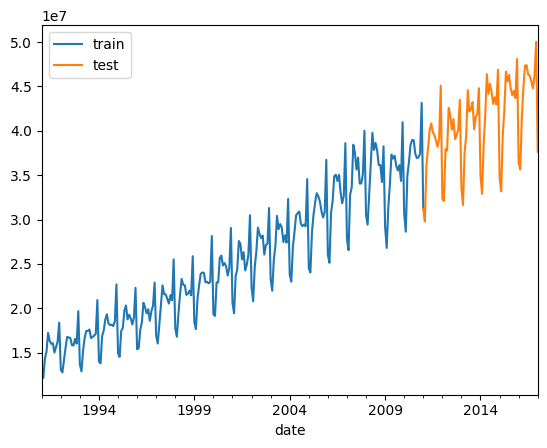

In [7]:
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [8]:
from sklearn.preprocessing import MinMaxScaler    # 아웃라이어에 취약

sc = MinMaxScaler()
sc.fit(train)
train_sc = sc.transform(train)
test_sc = sc.transform(test)
train_sc[:10]

array([[0.01402033],
       [0.        ],
       [0.0704258 ],
       [0.09531795],
       [0.16362761],
       [0.13514108],
       [0.12395846],
       [0.12617398],
       [0.09230917],
       [0.11139526]])

In [9]:
# 넘파이배열을 데이터프레임으로 변환

train_sc_df = pd.DataFrame(train_sc, columns=['Scaled'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Scaled'], index=test.index)
train_sc_df.head()

,Scaled
date,
1991-01-01,0.014020
1991-02-01,0.000000
1991-03-01,0.070426
1991-04-01,0.095318
1991-05-01,0.163628


In [10]:
s = pd.Series([100, 200, 300])
s2 = s.shift(1) 
print(s)
print(s2)

0    100
1    200
2    300
dtype: int64
0      NaN
1    100.0
2    200.0
dtype: float64


In [13]:
train_sc_df['Scaled'].shift(1), train_sc_df['Scaled'].shift(2)

(date
 1991-01-01         NaN
 1991-02-01    0.014020
 1991-03-01    0.000000
 1991-04-01    0.070426
 1991-05-01    0.095318
                 ...   
 2010-09-01    0.814394
 2010-10-01    0.799167
 2010-11-01    0.802101
 2010-12-01    0.814829
 2011-01-01    1.000000
 Name: Scaled, Length: 241, dtype: float64,
 date
 1991-01-01         NaN
 1991-02-01         NaN
 1991-03-01    0.014020
 1991-04-01    0.000000
 1991-05-01    0.070426
                 ...   
 2010-09-01    0.863983
 2010-10-01    0.814394
 2010-11-01    0.799167
 2010-12-01    0.802101
 2011-01-01    0.814829
 Name: Scaled, Length: 241, dtype: float64)

In [17]:
# 과거값 12개로 현재값을 예측하고자 함
for s in range(1, 13):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['Scaled'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['Scaled'].shift(s)
train_sc_df.head(13)

,Scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
date,,,,,,,,,,,,,
1991-01-01,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-02-01,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-03-01,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-04-01,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-05-01,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-06-01,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-07-01,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN
1991-08-01,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN
1991-09-01,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN


In [19]:
train_sc_df.dropna()

,Scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
date,,,,,,,,,,,,,
1992-01-01,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020
1992-02-01,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000
1992-03-01,0.065964,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426
1992-04-01,0.109831,0.065964,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318
1992-05-01,0.149130,0.109831,0.065964,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-09-01,0.799167,0.814394,0.863983,0.865311,0.847598,0.784536,0.736050,0.531665,0.597349,0.929722,0.716290,0.773687,0.754447
2010-10-01,0.802101,0.799167,0.814394,0.863983,0.865311,0.847598,0.784536,0.736050,0.531665,0.597349,0.929722,0.716290,0.773687
2010-11-01,0.814829,0.802101,0.799167,0.814394,0.863983,0.865311,0.847598,0.784536,0.736050,0.531665,0.597349,0.929722,0.716290


In [45]:
# 결측값 NaN 제거
#독립변수 : shift_1 ~ shift_12
X_train = train_sc_df.dropna().drop('Scaled', axis=1)
#종속변수 : Scaled
y_train = train_sc_df.dropna()[['Scaled']]
X_test = test_sc_df.dropna().drop('Scaled', axis=1)
y_test = test_sc_df.dropna()[['Scaled']]

In [46]:
X_train.head(3)

,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
date,,,,,,,,,,,,
1992-01-01,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020
1992-02-01,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000
1992-03-01,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426


In [47]:
X_train.values

array([[0.20091289, 0.13173822, 0.11139526, ..., 0.0704258 , 0.        ,
        0.01402033],
       [0.03002688, 0.20091289, 0.13173822, ..., 0.09531795, 0.0704258 ,
        0.        ],
       [0.01999285, 0.03002688, 0.20091289, ..., 0.16362761, 0.09531795,
        0.0704258 ],
       ...,
       [0.80210057, 0.79916654, 0.81439355, ..., 0.59734863, 0.92972161,
        0.71629034],
       [0.81482896, 0.80210057, 0.79916654, ..., 0.53166512, 0.59734863,
        0.92972161],
       [1.        , 0.81482896, 0.80210057, ..., 0.73605008, 0.53166512,
        0.59734863]])

In [48]:
#넘파이배열로 저장

X_train = X_train.values
X_test= X_test.values
y_train = y_train.values
y_test = y_test.values

print(X_train.shape)
print(X_train)
print(y_train)

(229, 12)
[[0.20091289 0.13173822 0.11139526 ... 0.0704258  0.         0.01402033]
 [0.03002688 0.20091289 0.13173822 ... 0.09531795 0.0704258  0.        ]
 [0.01999285 0.03002688 0.20091289 ... 0.16362761 0.09531795 0.0704258 ]
 ...
 [0.80210057 0.79916654 0.81439355 ... 0.59734863 0.92972161 0.71629034]
 [0.81482896 0.80210057 0.79916654 ... 0.53166512 0.59734863 0.92972161]
 [1.         0.81482896 0.80210057 ... 0.73605008 0.53166512 0.59734863]]
[[0.03002688]
 [0.01999285]
 [0.06596369]
 [0.10983126]
 [0.14912986]
 [0.14718865]
 [0.14464787]
 [0.11898427]
 [0.11802682]
 [0.14222108]
 [0.12459168]
 [0.24290801]
 [0.04899091]
 [0.02408276]
 [0.09865054]
 [0.14480155]
 [0.17061844]
 [0.17067229]
 [0.17603636]
 [0.1449117 ]
 [0.14957943]
 [0.15381982]
 [0.16036484]
 [0.28308682]
 [0.05971347]
 [0.05306762]
 [0.15199345]
 [0.17230214]
 [0.21246911]
 [0.23131079]
 [0.1982186 ]
 [0.19187716]
 [0.19381714]
 [0.18857277]
 [0.20528237]
 [0.33988685]
 [0.08949179]
 [0.07634802]
 [0.17110473]


In [49]:
X_train.shape

(229, 12)

In [53]:
print(X_train[0], y_train[0])
print(X_train[1], y_train[1])

[0.20091289 0.13173822 0.11139526 0.09230917 0.12617398 0.12395846
 0.13514108 0.16362761 0.09531795 0.0704258  0.         0.01402033] [0.03002688]
[0.03002688 0.20091289 0.13173822 0.11139526 0.09230917 0.12617398
 0.12395846 0.13514108 0.16362761 0.09531795 0.0704258  0.        ] [0.01999285]


In [25]:
# 케라스에 필요한 3차원 형태로 변환
# RNN에는 시간 개념이 있기 때문에 차원이 추가됨
# [size,timestep,변수개수]

X_train_t = X_train.reshape(X_train.shape[0], 12, 1)
                            # 타임스텝, 샘플수
X_test_t = X_test.reshape(X_test.shape[0], 12, 1)
print("최종 DATA")
print(X_train_t.shape)
print(X_train_t)
print(y_train)

최종 DATA
(229, 12, 1)
[[[0.20091289]
  [0.13173822]
  [0.11139526]
  ...
  [0.0704258 ]
  [0.        ]
  [0.01402033]]

 [[0.03002688]
  [0.20091289]
  [0.13173822]
  ...
  [0.09531795]
  [0.0704258 ]
  [0.        ]]

 [[0.01999285]
  [0.03002688]
  [0.20091289]
  ...
  [0.16362761]
  [0.09531795]
  [0.0704258 ]]

 ...

 [[0.80210057]
  [0.79916654]
  [0.81439355]
  ...
  [0.59734863]
  [0.92972161]
  [0.71629034]]

 [[0.81482896]
  [0.80210057]
  [0.79916654]
  ...
  [0.53166512]
  [0.59734863]
  [0.92972161]]

 [[1.        ]
  [0.81482896]
  [0.80210057]
  ...
  [0.73605008]
  [0.53166512]
  [0.59734863]]]
[[0.03002688]
 [0.01999285]
 [0.06596369]
 [0.10983126]
 [0.14912986]
 [0.14718865]
 [0.14464787]
 [0.11898427]
 [0.11802682]
 [0.14222108]
 [0.12459168]
 [0.24290801]
 [0.04899091]
 [0.02408276]
 [0.09865054]
 [0.14480155]
 [0.17061844]
 [0.17067229]
 [0.17603636]
 [0.1449117 ]
 [0.14957943]
 [0.15381982]
 [0.16036484]
 [0.28308682]
 [0.05971347]
 [0.05306762]
 [0.15199345]
 [0.172

In [54]:
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(LSTM(20, input_shape=(12, 1))) # (timestep, 변수개수)
            # 출력노드 20개, input_shape (샘플수는 중요하지 않음, timestep)
model.add(Dense(1)) # 출력층의 노드 개수 1
model.compile(loss='mse', optimizer='adam')
            # mean_squared_error 연속적인 값 예측
model.fit(X_train_t, y_train, epochs=250, batch_size=64, verbose=1)    
# validation_split을 하거나 데이터에 x_val 데이터를 라벨링을 해도 좋음

# input         순환        output
# (12,1)                    1       회귀

Epoch 1/250
4/4 [==============================] - 1s 9ms/step - loss: 0.1866
Epoch 2/250
4/4 [==============================] - 0s 18ms/step - loss: 0.1460
Epoch 3/250
4/4 [==============================] - 0s 12ms/step - loss: 0.1089
Epoch 4/250
4/4 [==============================] - 0s 12ms/step - loss: 0.0763
Epoch 5/250
4/4 [==============================] - 0s 18ms/step - loss: 0.0482
Epoch 6/250
4/4 [==============================] - 0s 5ms/step - loss: 0.0277
Epoch 7/250
4/4 [==============================] - 0s 6ms/step - loss: 0.0155
Epoch 8/250
4/4 [==============================] - 0s 6ms/step - loss: 0.0121
Epoch 9/250
4/4 [==============================] - 0s 5ms/step - loss: 0.0143
Epoch 10/250
4/4 [==============================] - 0s 6ms/step - loss: 0.0158
Epoch 11/250
4/4 [==============================] - 0s 5ms/step - loss: 0.0137
Epoch 12/250
4/4 [==============================] - 0s 6ms/step - loss: 0.0112
Epoch 13/250
4/4 [==============================] - 0s 5m

In [55]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 20)                1760      
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


In [56]:
score=model.evaluate(X_test_t, y_test, verbose=0)
print(score) # 평균제곱오차: 작은 것처럼 보이지만 스케일링을 했으므로 실제 오차와 차이가 있음
y_pred = model.predict(X_test_t)
print(y_pred.flatten()[:10])
print(y_test.flatten()[:10])

0.0029058323707431555
2/2 [==============================] - 0s 3ms/step
[0.69433916 0.675254   0.8190024  0.8654334  0.9103966  0.92731804
 0.9048969  0.89771336 0.88299096 0.86833584]
[0.65198848 0.6431242  0.83176496 0.82666946 0.98182284 0.95616179
 0.90265615 0.94107108 0.86841056 0.88189991]


In [29]:
import numpy as np

#실제값-예측값의 평균값
np.mean(y_test - y_pred)
y_predicted = sc.inverse_transform(y_pred)    # 스케일링데이터 > 원래 데이터로 바꿈
y_tested = sc.inverse_transform(y_test)  
np.mean(y_tested - y_predicted)

1281380.4262295081

In [58]:
print(y_pred.flatten()[:10])
print(y_predicted.flatten()[:10])

[0.69433916 0.675254   0.8190024  0.8654334  0.9103966  0.92731804
 0.9048969  0.89771336 0.88299096 0.86833584]
[34561064. 34897892. 37834016. 38845564. 39653736. 39842640. 39396692.
 39232856. 39007728. 38919972.]


In [35]:
np.zeros(len(y_test)) + np.nan

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [40]:
(np.zeros(len(y_test)) + np.nan)[:5]

array([nan, nan, nan, nan, nan])

In [38]:
y_train.flatten()[:5]

array([0.03002688, 0.01999285, 0.06596369, 0.10983126, 0.14912986])

In [43]:
np.concatenate((y_train.flatten()[:5], (np.zeros(len(y_test)) + np.nan)[:5]))

array([0.03002688, 0.01999285, 0.06596369, 0.10983126, 0.14912986,
              nan,        nan,        nan,        nan,        nan])

In [44]:
np.concatenate(((np.zeros(len(y_test)) + np.nan)[:5], pred.flatten()[:5]))

array([       nan,        nan,        nan,        nan,        nan,
       0.72294676, 0.73381454, 0.8285476 , 0.86118484, 0.88726032])

2/2 [==============================] - 0s 4ms/step


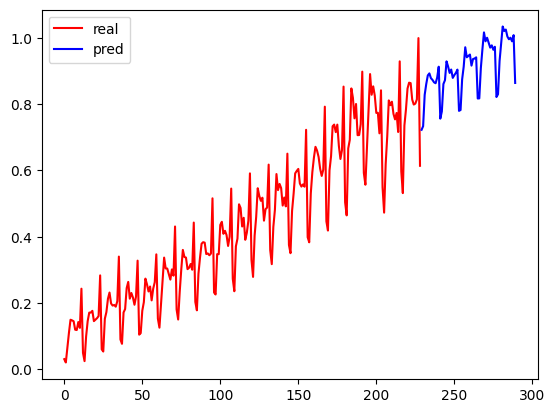

In [30]:
import matplotlib.pyplot as plt

pred = model.predict(X_test_t)
a= np.concatenate((y_train.flatten(), np.zeros(len(y_test))+np.nan))
    # flatten: 데이터를 1차원으로 연결
b = np.concatenate((np.zeros(len(y_train))+np.nan, pred.flatten()))
plt.plot(a, 'r-', label='real')
plt.plot(b, 'b-', label='pred')
plt.legend()
plt.show()

In [ ]:
# 순환신경망에서 제일 중요한 것은 shift
# 스케일링 하는 이유: 분산이 너무 큼 (적게 맞춰주기 위해서)

In [ ]:
#### 메모리 에러나는 경우,
# gpu memory 점진적으로 쓰는 방법

# 1)
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)

#gpu의 메모리를 점진적으로 늘리도록 설정
tf.config.experimental.set_memory_growth(gpus[0],True)

# 메모리 사용량을 직접 지정하는 방법
# tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=512)])
# 3가지 옵션을 바꿔가면서 gpu 메모리 사용량 확인

# 2) 
with tf.device('/:CRU0'):
    model.fit(X_train,y_train, epochs=250, batch_size = 64, verbose = 1)